                                                          # **CAR PRICE PREDICTION MODEL**



Importing Dependencies

In [ ]:
import pandas as pd #for python libraries
import matplotlib.pyplot as plt #visualisation library
import seaborn as sns #for data visualisation

In [ ]:
from sklearn.model_selection import train_test_split #for splitting data into two parts; training and test data
from sklearn.linear_model import LinearRegression #for importing linear regression model
from sklearn.linear_model import Lasso #for importing lasso model
from sklearn import metrics #for finding the accuracy of the data

Data Collection and Processing

In [ ]:
car_dataset = pd.read_csv('/content/car data.csv')

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.shape

(301, 9)

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Checking The Missing Values

In [ ]:
car_dataset.isnull().sum() 

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
print(car_dataset.Fuel_Type.value_counts()) 
print(car_dataset.Seller_Type.value_counts()) 
print(car_dataset.Transmission.value_counts()) 

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


**Encoding the data set**

In [ ]:


car_dataset.replace({'Fuel_Type' : {"Petrol": 0 , "Diesel": 1 , "CNG" : 2}},inplace=True)
#We change values of petrol,diesel and cng to 0,1,2 respectively

#We change the values for seller type as well just as we did for fuel type
car_dataset.replace({'Seller_Type' : {"Dealer": 0 , "Individual": 1}},inplace=True)

#We change the values for Transmission into 0,1,2 values as well
car_dataset.replace({'Transmission' : {"Manual": 0 , "Automatic": 1}},inplace=True)

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting Data and Target


In [ ]:
#For performing splitting of data we take two vectors 'X' and 'Y'
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price'] #Y contains our target values

In [ ]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [ ]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

Splitting Training and Test Data

In [ ]:
#We take 4 variables; 
#Xtrain-contains all independent variables that are used to train the model
#Ytrain-it is the dependent variable,that the model predicts using independent variable X
#Xtest- the portion of independent variables which are used for testing(accuracy testing of model)
#Ytest- will be used to test the accuracy of actual values and the predicted values 
# 0.1- denotes 10% testing data and remaining 90% data is training data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1,random_state = 2)

Model Training



1.   Linear Regression model



In [ ]:
#storing the LinearRegression() into a smaller variable called lin_reg_model
lin_reg_model = LinearRegression() 

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation using Training Data

In [ ]:
#prediction using Training Data
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
#comparing the predicted values with the original values using R2 error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error: ",error_score)


R squared Error:  0.8799451660493711


Visualizing the above Data 

Text(0.5, 1.0, 'Actual Price vs Predicted Price')

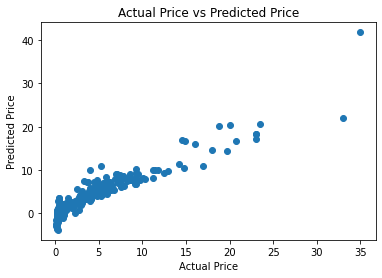

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

Accuracy Evaluation Using Test Data


In [ ]:
#test data prediction
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
#comparing the predicted values with the original values using R2 error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error: ",error_score)

R squared Error:  0.8365766715027051


Visualising the above data

Text(0.5, 1.0, 'Actual Price vs Predicted Price')

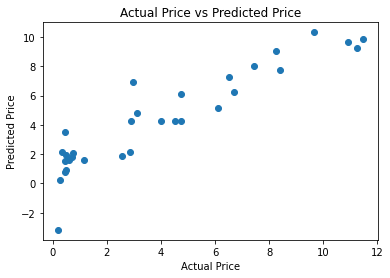

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")


2.   Lasso Regression



In [ ]:
#storing the LassoRegression() into a smaller variable called lin_reg_model
lass_reg_model = Lasso() 

In [ ]:
#fit function is used to train our model
lass_reg_model.fit(X_train,Y_train)

Lasso()

Model Evaluation using Training Data

In [ ]:
#prediction using Training Data and storing it in training data prediction variable
training_data_prediction = lass_reg_model.predict(X_train)

In [ ]:
#comparing the predicted values with the original values using R2 error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error: ",error_score)


R squared Error:  0.8427856123435794


Visualizing the above Data 

Text(0.5, 1.0, 'Actual Price vs Predicted Price')

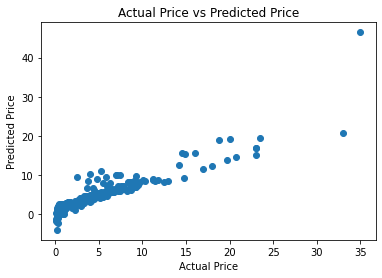

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

Accuracy Evaluation Using Test Data


In [ ]:
#test data prediction
test_data_prediction = lass_reg_model.predict(X_test)

In [ ]:
#comparing the predicted values with the original values using R2 error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error: ",error_score)

R squared Error:  0.8709167941173195


Visualising the above data

Text(0.5, 1.0, 'Actual Price vs Predicted Price')

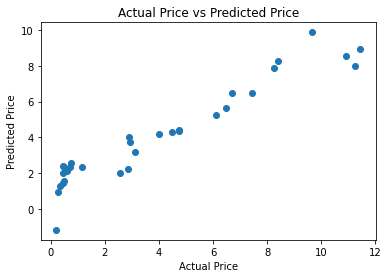

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")